## PRACTICAL MACHINE LEARNING  CHALLENGE

# CONTENTS

* Import necessary libraries & dataset
* Statistics of customer mall visits
* Plot of Average visits by day
* Histogram & probability Plot of the number of visits for the customers


* Creating simple statistical features
* Customers visits on 03 most frequent days (sat, sun, mon) grouped by low, medium, and high difference of days from last visit


* Defining features and labels
* Label encoder for dependent variable
* Class distributions of the visited day
* Stratified train test split
* Feature scaling


* Machine learning models
* Performance Metrics
* Features Importance Plot using Random Forest
* Deep Learning Model
* Further Model Improvements

###  IMPORT NECESSARY LIBRARIES & DATASET

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context("paper", font_scale=1.4) 
pd.set_option('precision', 3)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('train_set.csv')
df.head(2)

,visitor_id,visits
0,1,30 84 126 135 137 179 242 342 426 456 460 462...
1,2,24 53 75 134 158 192 194 211 213 238 251 305 ...


In [3]:
df = df.rename(columns={' visits': 'visits'})
print(f"Dataset comprises {df.visitor_id.nunique()} unique customers")

Dataset comprises 300000 unique customers


### MODELING DAY PREDICTION AS A CLASSIFICATION PROBLEM

The task is to predict the first day of the next visit (week 144), which can be from Monday to Sunday. So we will model this as a Classification Problem. 

#### FIRST FIVE RECORDS

In [4]:
df1=df.visits.str.split()
df1=pd.DataFrame(df1)
df1.visits[:5]

0    [30, 84, 126, 135, 137, 179, 242, 342, 426, 45...
1    [24, 53, 75, 134, 158, 192, 194, 211, 213, 238...
2    [51, 143, 173, 257, 446, 491, 504, 510, 559, 6...
3    [1, 20, 22, 92, 124, 149, 211, 335, 387, 390, ...
4    [34, 51, 56, 106, 110, 121, 163, 233, 266, 275...
Name: visits, dtype: object

In [5]:
# Removing the output variable 'y' from the data (last day that is to be predicted)
y=[]
for i in range(len(df1.visits)):
    y.append(df1.visits[i][-1])

In [6]:
for i in range(len(df1.visits)):
    del df1.visits[i][-1]

In [7]:
# Mapping of numbers to days
A = list(range(1,1002))
B = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
Z = []
for i, a in enumerate(A):
    Z.append((a, B[i % len(B)]))
d=dict(Z)

In [8]:
Count_Visits=[len(df1.visits[i]) for i in range(len(df1))]
df1['Count_Visits']=Count_Visits

### STATISTICS OF CUSTOMER MALL VISITS

In [9]:
df1.Count_Visits.describe()

count    300000.000
mean        110.815
std          40.649
min          21.000
25%          78.000
50%         102.000
75%         142.000
max         261.000
Name: Count_Visits, dtype: float64

* The mean number of visits are 110 with a standard deviation of 40.


* Minimum visit of Mall=21 and max =261

In [10]:
# Days Mapping
def days_name():
    z=[]
    for i in list(range(len(df1.visits))):
        int_lst = [int(x) for x in df1.visits[i]]
        a=[d[key] for key in int_lst]
        z.append(a)
    return z
aa=days_name()

In [11]:
# Number of Visits for each day by customers
df1['Days']=aa
df1['Monday']=df1.Days.apply(lambda x: x.count('Monday'))
df1['Tuesday']=df1.Days.apply(lambda x: x.count('Tuesday'))
df1['Wednesday']=df1.Days.apply(lambda x: x.count('Wednesday'))
df1['Thursday']=df1.Days.apply(lambda x: x.count('Thursday'))
df1['Friday']=df1.Days.apply(lambda x: x.count('Friday'))
df1['Saturday']=df1.Days.apply(lambda x: x.count('Saturday'))
df1['Sunday']=df1.Days.apply(lambda x: x.count('Sunday'))

### AVERAGE VISITS BY DAY

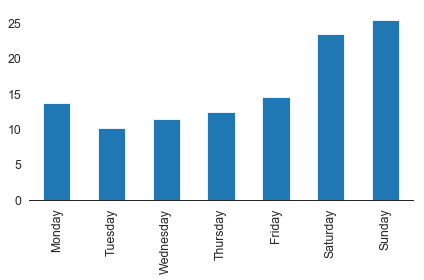

In [12]:
visit_day=df1.iloc[:,3:].mean()
plt.figure(figsize=(6,4))
visit_day.plot(kind='bar');
sns.despine(left=True)
plt.tight_layout() 

* Saturday and Sunday are the most visited days, followed by Monday

### HISTOGRAM & PROBABILITY PLOT OF THE NUMBER OF VISITS FOR THE CUSTOMERS

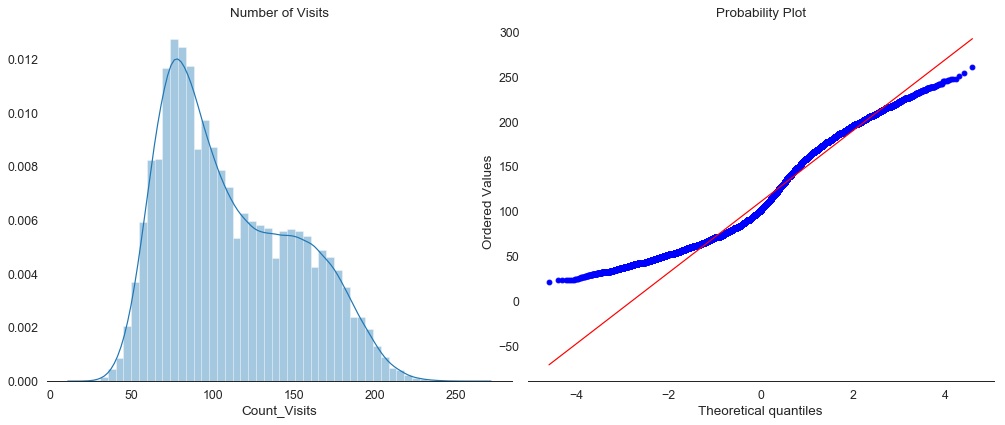

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(df1.Count_Visits)
plt.title('Number of Visits')
plt.tight_layout() 

plt.subplot(1,2,2)
stats.probplot(df1.Count_Visits, plot=plt);
plt.title('Probability Plot')
sns.despine(left=True);

The distribution of the number of visits is close to normal pprobability distribution

## CREATING SIMPLE STATISTICAL FEATURES

**Count_Visits** : Count of the total number of Visits so far

**Monday, Tuesday....** : Count of the number of visits for each day

**std** : Standard deviation of the difference from previous days of the customer visit

**Mean** : Mean number of difference in visit days

**Median** : Median number of difference in visit days

**first_diff** : The difference in number of days between present visit & last visit

**sec_diff** : The difference in number of days between n-1 visit & n-2 visit


**Third_diff** : The difference in number of days between n-2 visit & n-3 visit

In [14]:
def stats():
    diff=[]
    std=[]
    mean=[]
    median=[]
    first_diff=[]
    sec_diff=[]
    third_diff=[]
    for i in list(range(len(df1.visits))):
        int_lst = [int(x) for x in df1.visits[i]]
        d=np.diff(int_lst)
        diff.append(d)
        std.append(np.std(d))
        mean.append(np.mean(d))
        median.append(np.median(d))
        first_diff.append(d[0])
        sec_diff.append(d[1])
        third_diff.append(d[2])
    return diff,std,mean,median,first_diff,sec_diff,third_diff
diff,std,mean,median,first_diff,sec_diff,third_diff=stats()

In [15]:
df1['Difference']=diff
df1['std']=std
df1['Mean']=mean
df1['Median']=median
df1['first_diff']=first_diff
df1['sec_diff']=sec_diff
df1['third_diff']=third_diff

#### CUSTOMERS VISITS ON 03 MOST FREQUENT DAYS (SAT, SUN, MON) GROUPED BY LOW, MEDIUM, AND HIGH DIFFERENCE OF DAYS FROM LAST VISIT

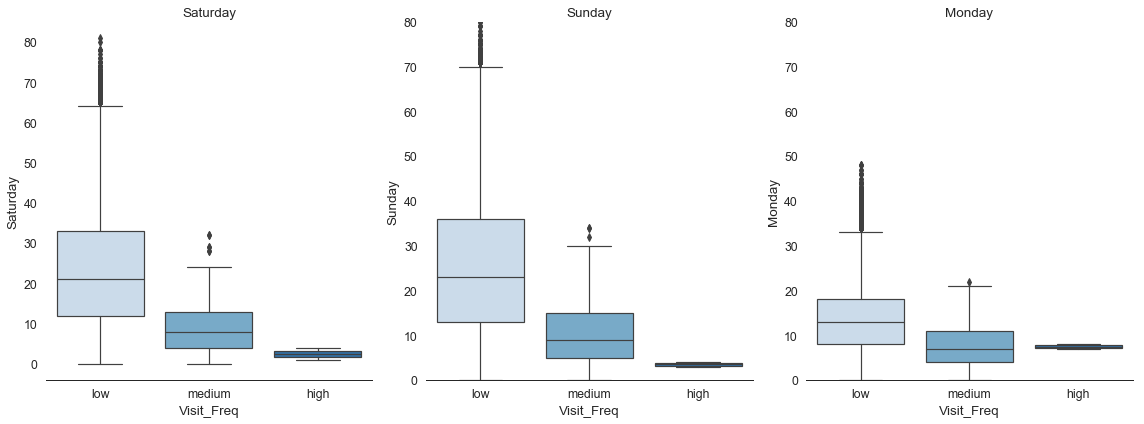

In [16]:
s=pd.cut(df1.first_diff,3,labels=["low", "medium", "high"])
df2=df1.copy(deep=True)
df2['Visit_Freq']=s

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.boxplot(x="Visit_Freq", y="Saturday", data=df2, palette='Blues');
plt.title('Saturday')

plt.subplot(1,3,2)
sns.boxplot(x="Visit_Freq", y="Sunday", data=df2, palette='Blues')
plt.ylim(0, 80)
plt.title('Sunday')

plt.subplot(1,3,3)
sns.boxplot(x="Visit_Freq", y="Monday", data=df2, palette='Blues')
plt.ylim(0, 80)
plt.title('Monday')
sns.despine(left=True);
plt.tight_layout() 

*Consideable drop in visits on Monday for the medium and high frequency group, however low frequency group visits remains same*

### DEFINING FEATURES AND LABELS

In [17]:
df1=df1.loc[:,['Count_Visits','Monday','Tuesday','Wednesday','Thursday',
                'Friday','Saturday','Sunday','std','Mean','Median',
                'first_diff','sec_diff','third_diff']]

In [18]:
df1.head()

,Count_Visits,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,std,Mean,Median,first_diff,sec_diff,third_diff
0,25,2,5,1,6,2,4,5,34.019,38.167,25.5,54,42,9
1,28,4,0,9,5,6,1,3,29.344,35.444,24.0,29,22,59
2,25,1,4,1,1,5,8,5,41.964,37.708,25.0,92,30,84
3,24,5,3,2,2,7,3,2,40.075,41.826,25.0,19,2,70
4,25,3,11,1,1,4,1,4,30.045,31.667,18.5,17,5,50


In [19]:
#Dependent Variable
y = [int(i) for i in y] 
y=[d[k] for k in y]

In [20]:
X=df1.iloc[:,:]
y1=y.copy()

### LABEL ENCODER FOR DEPENDENT VARIABLE

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y1)
y1=le.transform(y1)

### CLASS DISTRIBUTIONS OF THE VISITED DAY

In [22]:
unique, counts=np.unique(y1, return_counts=True)
print(unique)
print(counts)

[0 1 2 3 4 5 6]
[36535 25231 68307 92808 28428 22601 26090]


**It is obvious that the classes are imbalance, thus metrics other then simple accuracy should be taken into account**

### STRATIFIED TRAIN TEST SPLIT

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y1, stratify=y1,test_size=0.20, random_state=42)

print('No of Observation in the training set: ',len(X_train))
print('\nNo of Observation in the testing set: ', len(X_test))

No of Observation in the training set:  240000

No of Observation in the testing set:  60000


### FEATURE SCALING

In [24]:
# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###  MACHINE LEARNING MODELS
1. Logistic Regression
2. Random Forest Classifier
3. Extra Trees Classifier
4. XGBoost

In [26]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost

In [27]:
#Logistic Regression
lr = LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial')
lr.fit(X_train, y_train)


# Random Forest
rf=RandomForestClassifier(n_estimators=50,max_depth=None,random_state=42)
rf.fit(X_train, y_train)

#Xgboost
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBClassifier(n_estimators=50, random_state=42)
xgb=xgb.fit(X_train,y_train)


#ExtraTrees
et = ExtraTreesClassifier(n_estimators=50, max_depth=None,random_state=42)
et=et.fit(X_train,y_train)

### PERFORMANCE METRICS
1. Accuracy
2. Precision
3. Recall
4. F1 Score

**Taking Micro-average becasuse there is a class imbalance problem**

In [30]:
from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score

lr_acc=accuracy_score(y_test, lr.predict(X_test))  
rf_acc=accuracy_score(y_test, rf.predict(X_test)) 
xgb_acc=accuracy_score(y_test, xgb.predict(X_test)) 
et_acc=accuracy_score(y_test, et.predict(X_test)) 

lr_pr=precision_score(y_test, lr.predict(X_test),average='micro') 
rf_pr=precision_score(y_test, rf.predict(X_test),average='micro') 
xgb_pr=precision_score(y_test, xgb.predict(X_test),average='micro')  
et_pr=precision_score(y_test, et.predict(X_test),average='micro') 

lr_f1=f1_score(y_test, lr.predict(X_test),average='micro') 
rf_f1=f1_score(y_test, rf.predict(X_test),average='micro') 
xgb_f1=f1_score(y_test, xgb.predict(X_test),average='micro')  
et_f1=f1_score(y_test, et.predict(X_test),average='micro') 

lr_rc=recall_score(y_test, lr.predict(X_test),average='micro') 
rf_rc=recall_score(y_test, rf.predict(X_test),average='micro') 
xgb_rc=recall_score(y_test, xgb.predict(X_test),average='micro') 
et_rc=recall_score(y_test, et.predict(X_test),average='micro')  

### RESULTS TEST DATASET

In [31]:
#TEST
results=pd.DataFrame({'Algorithm':['Logistic Regression','Random Forest','XGBoost', 'ExtraTrees'],
                     'Accuracy':[lr_acc,rf_acc, xgb_acc, et_acc],
                     'Precision':[lr_pr,rf_pr, xgb_pr, et_pr],
                     'Recall':[lr_rc,rf_rc, xgb_rc, et_rc],
                     'F1-Score':[lr_f1,rf_f1, xgb_f1, et_f1]})
results.set_index('Algorithm', inplace=True)
results

,Accuracy,Precision,Recall,F1-Score
Algorithm,,,,
Logistic Regression,0.327,0.327,0.327,0.327
Random Forest,0.306,0.306,0.306,0.306
XGBoost,0.329,0.329,0.329,0.329
ExtraTrees,0.304,0.304,0.304,0.304


### FEATURE IMPORTANCE PLOT USING RANDOM FOREST

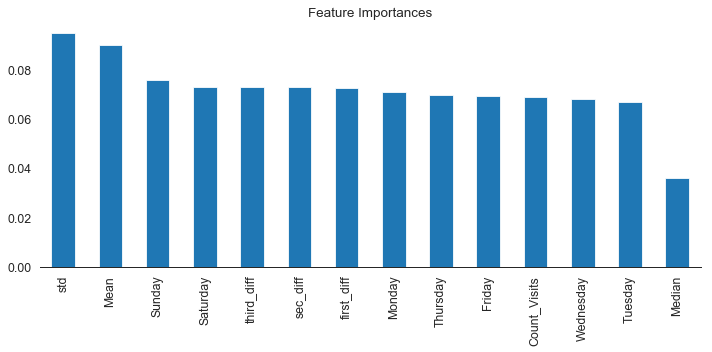

In [49]:
feature_indices = np.argsort(rf.feature_importances_)
fi = pd.DataFrame(index=X.columns[feature_indices], data=np.sort(rf.feature_importances_))
fi.sort_values(by=0, ascending=False, inplace=True)
ax = fi.plot(kind="bar", title="Feature Importances", figsize=(10, 5))
ax.legend_.remove()
sns.despine(left=True);
plt.tight_layout() 

* It is seen that the most important feature is the standard deviation of the difference from previous days of the customer visit, mean number of visits, visits on Sunday & Saturday

### DEEP LEARNING MODEL  : FEED-FORWARD NEURAL NETWORK

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

classifier = Sequential()

classifier.add(Dense(units = 40, kernel_initializer = 'uniform', activation = 'relu',
                     input_dim = X_train.shape[1]))

classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [28]:
classifier.fit(X_train, y_train, epochs =50, batch_size=32, validation_data=(X_test, y_test), 
               callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 240000 samples, validate on 60000 samples
Epoch 1/50
240000/240000 [==============================] - 39s 164us/step - loss: 1.7519 - acc: 0.3093 - val_loss: 1.7501 - val_acc: 0.3094
Epoch 2/50
240000/240000 [==============================] - 20s 82us/step - loss: 1.7429 - acc: 0.3156 - val_loss: 1.7422 - val_acc: 0.3237
Epoch 3/50
240000/240000 [==============================] - 20s 82us/step - loss: 1.7327 - acc: 0.3259 - val_loss: 1.7318 - val_acc: 0.3278
Epoch 4/50
240000/240000 [==============================] - 20s 82us/step - loss: 1.7280 - acc: 0.3274 - val_loss: 1.7289 - val_acc: 0.3275
Epoch 5/50
240000/240000 [==============================] - 20s 82us/step - loss: 1.7270 - acc: 0.3279 - val_loss: 1.7314 - val_acc: 0.3266
Epoch 6/50
240000/240000 [==============================] - 20s 82us/step - loss: 1.7264 - acc: 0.3277 - val_loss: 1.7276 - val_acc: 0.3281
Epoch 7/50
240000/240000 [==============================] - 

In [30]:
y_pred = classifier.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score
nn_acc=accuracy_score(y_test, y_pred)
nn_pr=precision_score(y_test, y_pred,average='micro') 
nn_f1=f1_score(y_test, y_pred,average='micro') 
nn_rc=recall_score(y_test, y_pred,average='micro') 

print('Accuracy:',nn_acc)
print('Precision:',nn_pr)
print('Recall:',nn_rc)
print('F1 Score:',nn_f1)

Accuracy: 0.3274
Precision: 0.3274
Recall: 0.3274
F1 Score: 0.3274


## FURTHER IMPROVEMENTS

1. Engineer more informative Features/Auto- feature generation
2. Optimize the models hyperparameters
3. Perform feature selectiom/Extraction
4. Improve Performance With Ensembles/ Stacking
5. Segment the customers with similar behavior into groups, thereby creating seperate model for each segment to improve prediction performance